### Data Cleaning and Preprocessing

In [2]:
import pandas as pd

In [3]:
#Load the dataset
df = pd.read_csv("ecommerce_customer_data_large.csv")

In [4]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [5]:
#Check null values
df.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [6]:
# Handle missing values in 'Returns'
df['Returns'].fillna(0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_16044\1705266910.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Returns'].fillna(0, inplace=True)


In [7]:
df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

In [8]:
# Drop duplicate columns (Customer Age & Age)
df.drop(columns=['Age'], inplace=True)

In [9]:
# Convert 'Purchase Date' to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

In [10]:
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Product Category', 'Payment Method', 'Gender'], drop_first=True)

In [11]:
# Create new features
latest_date = df['Purchase Date'].max()
df['Recency'] = (latest_date - df['Purchase Date']).dt.days
df['Purchase Frequency'] = df.groupby('Customer ID')['Purchase Date'].transform('count')
df['Average Order Value'] = df['Total Purchase Amount'] / df['Quantity']

In [12]:
# Drop unnecessary columns (Customer Name)
df.drop(columns=['Customer Name'], inplace=True)

In [13]:
print("Data Cleaning Completed.")

Data Cleaning Completed.


### Exploratory Data Analysis(EDA)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Quick Overview
print(df.head())

   Customer ID       Purchase Date  Product Price  Quantity  \
0        44605 2023-05-03 21:30:02            177         1   
1        44605 2021-05-16 13:57:44            174         3   
2        44605 2020-07-13 06:16:57            413         1   
3        44605 2023-01-17 13:14:36            396         3   
4        44605 2021-05-01 11:29:27            259         4   

   Total Purchase Amount  Customer Age  Returns  Churn  \
0                   2427            31      1.0      0   
1                   2448            31      1.0      0   
2                   2345            31      1.0      0   
3                    937            31      0.0      0   
4                   2598            31      1.0      0   

   Product Category_Clothing  Product Category_Electronics  \
0                      False                         False   
1                      False                          True   
2                      False                         False   
3                      F

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Customer ID                   250000 non-null  int64         
 1   Purchase Date                 250000 non-null  datetime64[ns]
 2   Product Price                 250000 non-null  int64         
 3   Quantity                      250000 non-null  int64         
 4   Total Purchase Amount         250000 non-null  int64         
 5   Customer Age                  250000 non-null  int64         
 6   Returns                       250000 non-null  float64       
 7   Churn                         250000 non-null  int64         
 8   Product Category_Clothing     250000 non-null  bool          
 9   Product Category_Electronics  250000 non-null  bool          
 10  Product Category_Home         250000 non-null  bool          
 11  Payment Metho

In [17]:
print(df.describe())

         Customer ID                  Purchase Date  Product Price  \
count  250000.000000                         250000  250000.000000   
mean    25017.632092  2021-11-06 19:26:22.286192384     254.742724   
min         1.000000            2020-01-01 00:07:26      10.000000   
25%     12590.000000            2020-12-03 08:10:12     132.000000   
50%     25011.000000     2021-11-06 07:39:08.500000     255.000000   
75%     37441.250000  2022-10-11 01:21:56.249999872     377.000000   
max     50000.000000            2023-09-13 18:42:49     500.000000   
std     14412.515718                            NaN     141.738104   

            Quantity  Total Purchase Amount   Customer Age        Returns  \
count  250000.000000          250000.000000  250000.000000  250000.000000   
mean        3.004936            2725.385196      43.798276       0.405904   
min         1.000000             100.000000      18.000000       0.000000   
25%         2.000000            1476.000000      30.000000   

In [18]:
# Check for Missing Values
print(df.isnull().sum())

Customer ID                     0
Purchase Date                   0
Product Price                   0
Quantity                        0
Total Purchase Amount           0
Customer Age                    0
Returns                         0
Churn                           0
Product Category_Clothing       0
Product Category_Electronics    0
Product Category_Home           0
Payment Method_Credit Card      0
Payment Method_PayPal           0
Gender_Male                     0
Recency                         0
Purchase Frequency              0
Average Order Value             0
dtype: int64


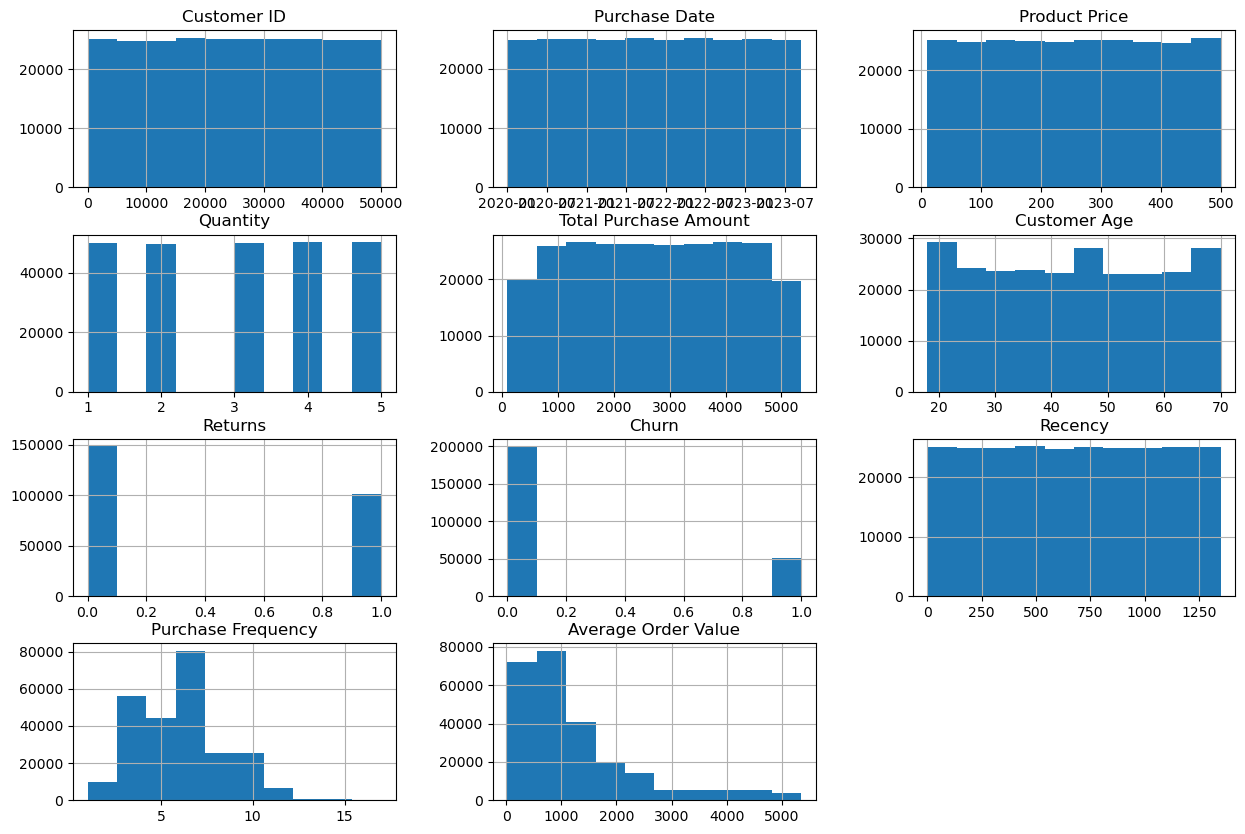

In [19]:
# Data Distribution
df.hist(figsize=(15, 10))
plt.show()

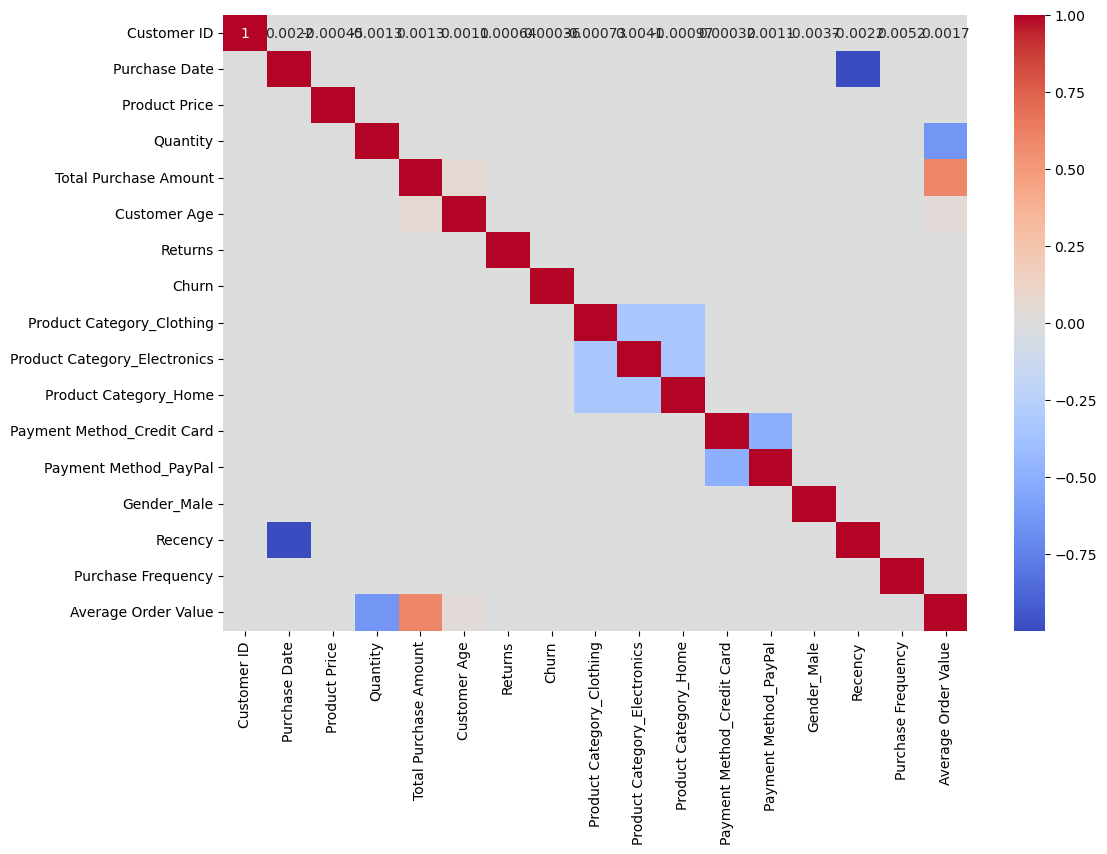

In [20]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

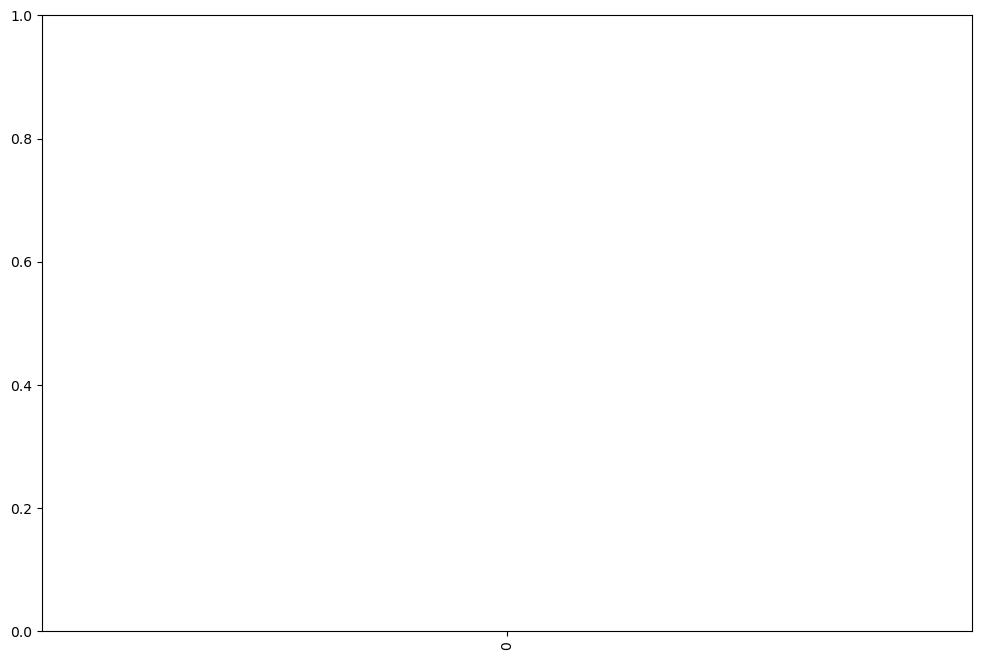

In [21]:
# Boxplot for Outliers
plt.figure(figsize=(12, 8))
sns.boxplot(df=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

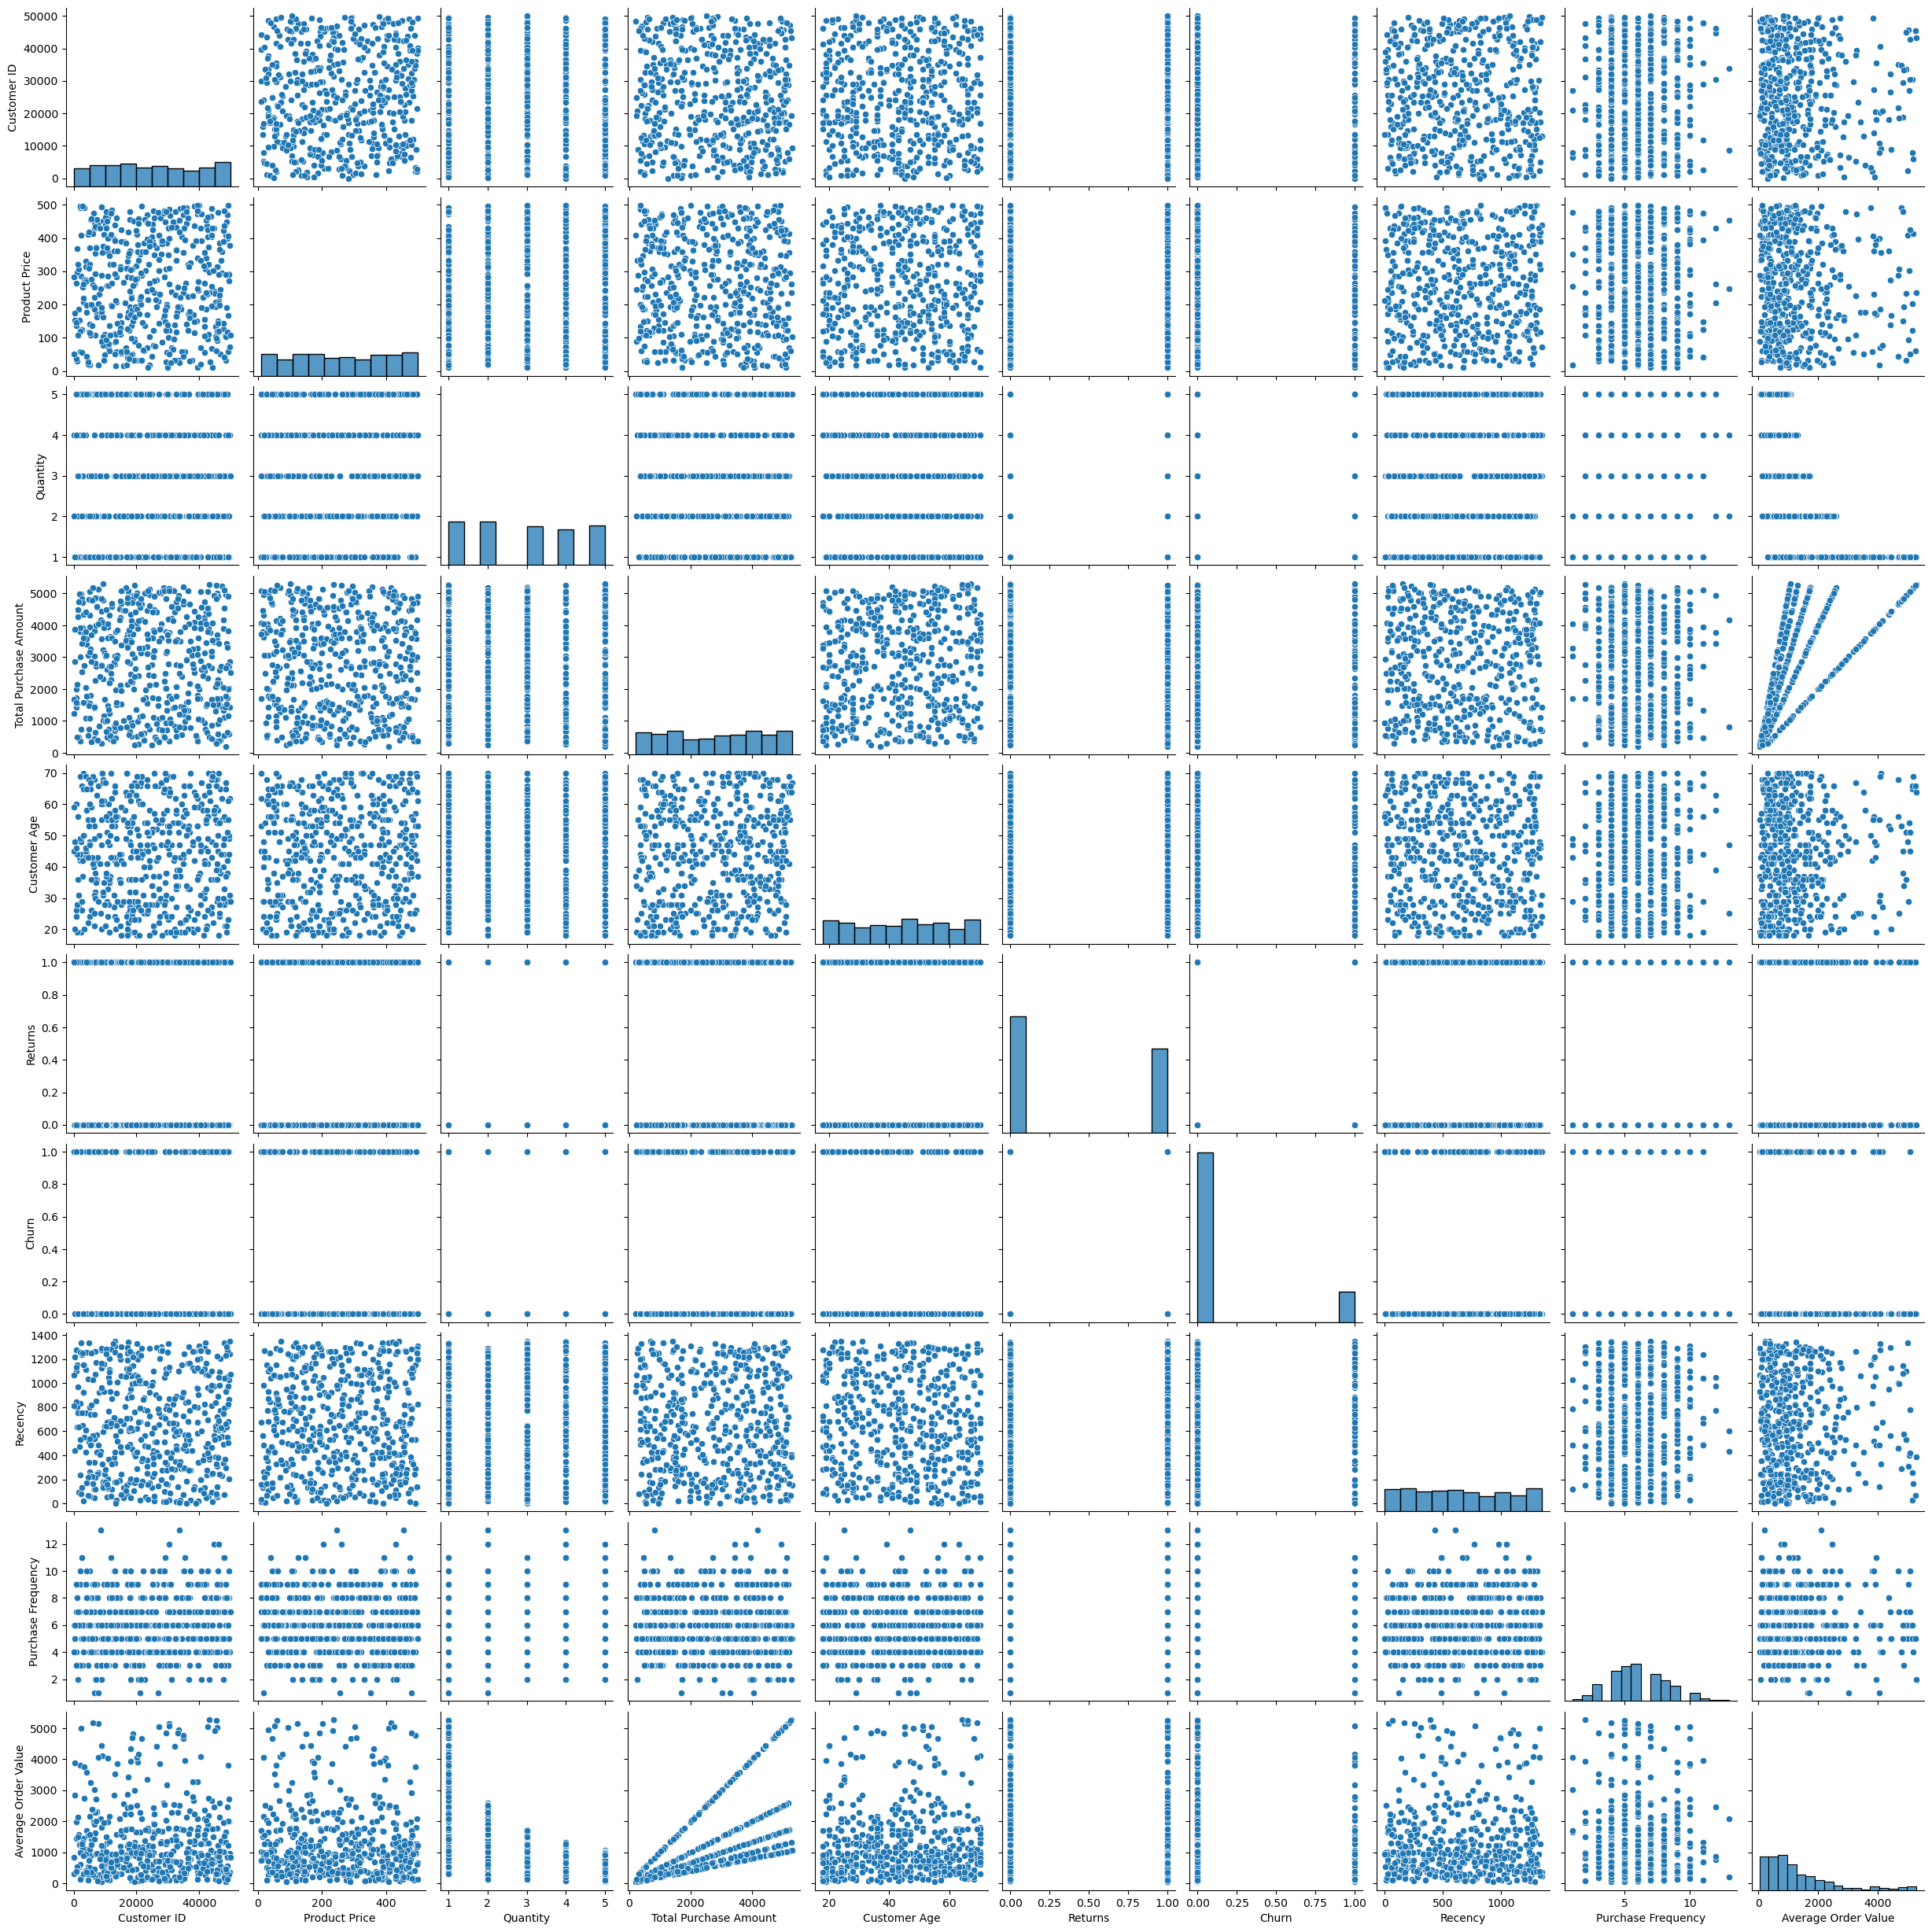

In [22]:
# Pairwise Relationships for Numeric Data
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numeric_columns].sample(500))  # Sampling to reduce computation for large datasets
plt.show()

In [23]:
df.head()

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Churn,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Credit Card,Payment Method_PayPal,Gender_Male,Recency,Purchase Frequency,Average Order Value
0,44605,2023-05-03 21:30:02,177,1,2427,31,1.0,0,False,False,True,False,True,False,132,5,2427.000000
1,44605,2021-05-16 13:57:44,174,3,2448,31,1.0,0,False,True,False,False,True,False,850,5,816.000000
2,44605,2020-07-13 06:16:57,413,1,2345,31,1.0,0,False,False,False,True,False,False,1157,5,2345.000000
3,44605,2023-01-17 13:14:36,396,3,937,31,0.0,0,False,True,False,False,False,False,239,5,312.333333
4,44605,2021-05-01 11:29:27,259,4,2598,31,1.0,0,False,False,False,False,True,False,865,5,649.500000


### Feature Engineering

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Feature engineering
df['Total Purchase'] = df['Product Price'] * df['Quantity']

# Splitting 'Purchase Date' into separate features (e.g., year, month, weekday)
df['Purchase Year'] = pd.to_datetime(df['Purchase Date']).dt.year
df['Purchase Month'] = pd.to_datetime(df['Purchase Date']).dt.month
df['Purchase Day'] = pd.to_datetime(df['Purchase Date']).dt.day
df['Purchase Weekday'] = pd.to_datetime(df['Purchase Date']).dt.weekday


### Model Selection, Training and Prediction

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['Customer ID', 'Purchase Date', 'Total Purchase', 'Churn'], axis=1)
y = df['Churn']

In [36]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [40]:
# Assuming you have already trained the models and made predictions:
logreg_pred = logreg.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)

logreg_prob = logreg.predict_proba(X_test)[:, 1]
rf_prob = rf.predict_proba(X_test)[:, 1]
xgb_prob = xgb.predict_proba(X_test)[:, 1]


In [41]:
# Comparing the models
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
predictions = [logreg_pred, rf_pred, xgb_pred]
probabilities = [logreg_prob, rf_prob, xgb_prob]

# Collect performance metrics
results = []
for i, model in enumerate(models):
    accuracy = accuracy_score(y_test, predictions[i])
    class_report = classification_report(y_test, predictions[i])
    auc_score = roc_auc_score(y_test, probabilities[i])
    
    results.append({
        'Model': model,
        'Accuracy': accuracy,
        'ROC-AUC': auc_score,
        'Classification Report': class_report
    })

# Display results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"ROC-AUC Score: {result['ROC-AUC']:.4f}")
    print(f"Classification Report:\n{result['Classification Report']}")
    print("-" * 50)

Model: Logistic Regression
Accuracy: 0.8003
ROC-AUC Score: 0.4990
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     40016
           1       0.00      0.00      0.00      9984

    accuracy                           0.80     50000
   macro avg       0.40      0.50      0.44     50000
weighted avg       0.64      0.80      0.71     50000

--------------------------------------------------
Model: Random Forest
Accuracy: 0.8003
ROC-AUC Score: 0.5085
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     40016
           1       0.20      0.00      0.00      9984

    accuracy                           0.80     50000
   macro avg       0.50      0.50      0.44     50000
weighted avg       0.68      0.80      0.71     50000

--------------------------------------------------
Model: XGBoost
Accuracy: 0.8005
ROC-AUC Score: 0.5264
Classification Rep

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Step 1: Compare performance based on Accuracy and ROC-AUC

# Collecting performance metrics into a DataFrame for easy comparison
import pandas as pd

metrics = pd.DataFrame(results)
metrics.set_index('Model', inplace=True)

# Print performance metrics (Accuracy, ROC-AUC)
print(metrics[['Accuracy', 'ROC-AUC']])

# Step 2: Determine which model performed better based on ROC-AUC
best_model = metrics['ROC-AUC'].idxmax()
print(f"\nThe best model based on ROC-AUC score is: {best_model}")

                     Accuracy   ROC-AUC
Model                                  
Logistic Regression   0.80032  0.499015
Random Forest         0.80026  0.508496
XGBoost               0.80048  0.526428

The best model based on ROC-AUC score is: XGBoost


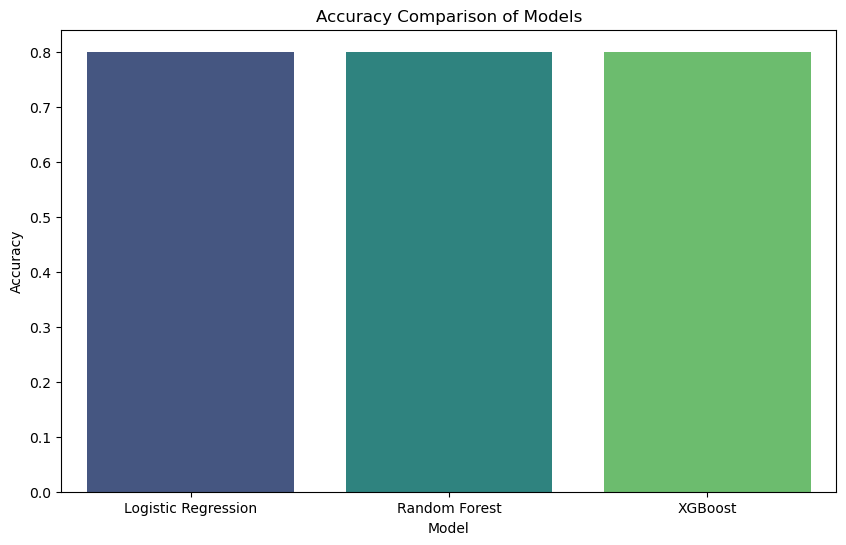

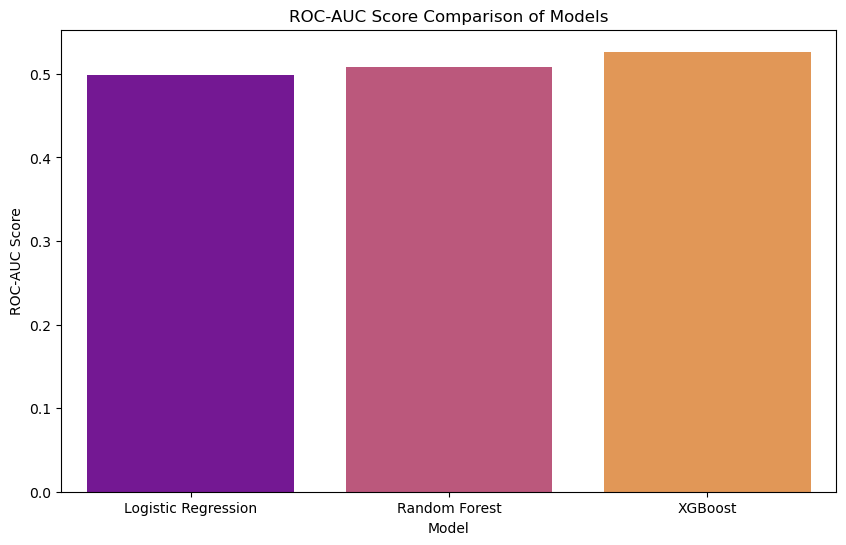

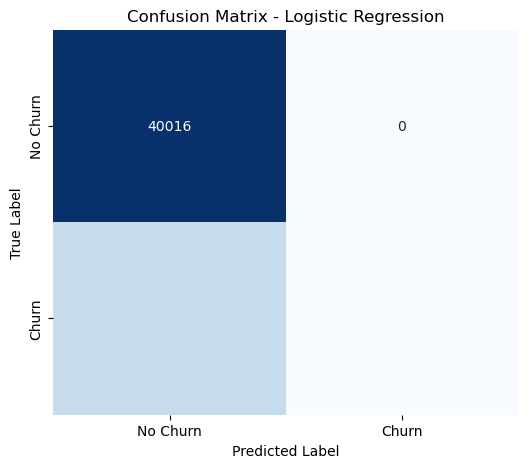

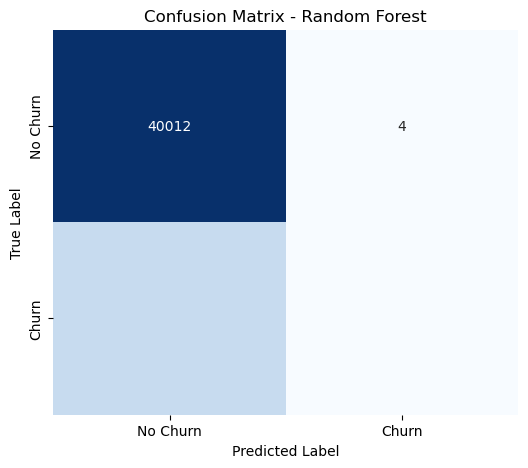

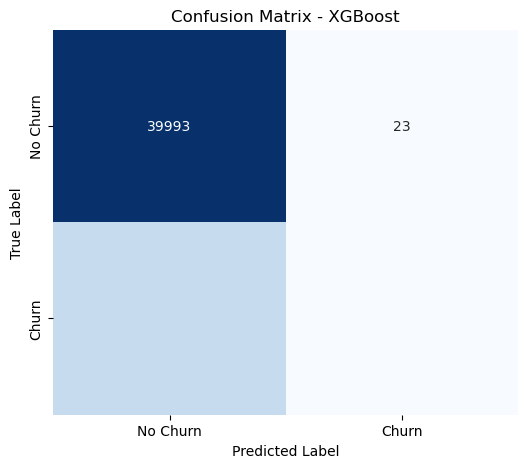

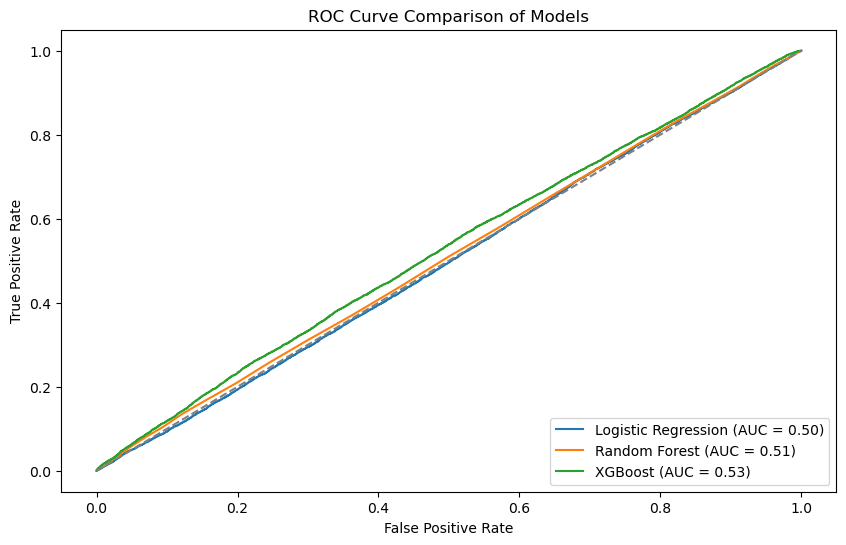

In [48]:
# Step 3: Visualize Performance - Bar chart for Accuracy and ROC-AUC

# Plotting Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics.index, y=metrics['Accuracy'], palette='viridis')
plt.title('Accuracy Comparison of Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

# Plotting ROC-AUC Score
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics.index, y=metrics['ROC-AUC'], palette='plasma')
plt.title('ROC-AUC Score Comparison of Models')
plt.ylabel('ROC-AUC Score')
plt.xlabel('Model')
plt.show()

# Step 4: Confusion Matrix Visualization
# Plot confusion matrix for each model
models = [logreg, rf, xgb]
for model, name in zip(models, ['Logistic Regression', 'Random Forest', 'XGBoost']):
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False, xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Step 5: Precision-Recall Curves (to understand model behavior for class imbalance)
plt.figure(figsize=(10, 6))
for model, prob, name in zip([logreg, rf, xgb], [logreg_prob, rf_prob, xgb_prob], ['Logistic Regression', 'Random Forest', 'XGBoost']):
    fpr, tpr, thresholds = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random model line
plt.title('ROC Curve Comparison of Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()